<font color="#CC3D3D"><p>
## A Comparison of Grid Search, Random Search, and Bayesian Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

# read the training data
df = pd.read_csv("./data/mobile_train.csv")
# features are all columns without price_range
# note that there is no id column in this dataset

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# here we have training features
X = df.drop("price_range", axis=1).values
# and the targets
y = df.price_range.values

In [5]:
# define the model here
# i am using random forest with n_jobs=-1
# n_jobs=-1 => use all cores

classifier = ensemble.RandomForestClassifier(n_jobs=-1, random_state=2022)

In [6]:
# define a grid of parameters
# this can be a dictionary or a list of dictionaries

param_grid = {
    "n_estimators": [100, 200, 250, 300, 400, 500],
    "max_depth": [1, 2, 5, 7, 11, 15],
    "criterion": ["gini", "entropy"]
}

#### GrideSearch

In [7]:
# initialize grid search
# estimator is the model that we have defined
# param_grid is the grid of parameters
# we use accuracy as our metric. you can define your own
# higher value of verbose implies a lot of details are printed
# cv=5 means that we are using 5 fold cv (not stratified)

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5
)

In [8]:
# fit the model and extract best score
model.fit(X, y)

print(f"Best score: {model.best_score_}")
print("Best parameters set:")

best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.568 total time=   6.7s
[CV 2/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.562 total time=   0.0s
[CV 3/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.580 total time=   0.0s
[CV 4/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.593 total time=   0.0s
[CV 5/5; 1/72] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/72] END criterion=gini, max_depth=1, n_estimators=100;, score=0.627 total time=   0.0s
[CV 1/5; 2/72] START criterion=gini, max_de

#### RandomSearch

In [9]:
# define a grid of parameters
# this can be a dictionary or a list of
# dictionaries
param_grid = {
    "n_estimators": np.arange(100, 2000, 100),
    "max_depth": np.arange(2, 64),
    "criterion": ["gini", "entropy"]
}

In [10]:
# initialize random search
# estimator is the model that we have defined
# param_distributions is the grid/distribution of parameters
# we use accuracy as our metric. you can define your own
# higher value of verbose implies a lot of details are printed
# cv=5 means that we are using 5 fold cv (not stratified)
# n_iter is the number of iterations we want
# if param_distributions has all the values as list,
# random search will be done by sampling without replacement
# if any of the parameters come from a distribution,
# random search uses sampling with replacement
model = model_selection.RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter=72,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5
)

In [11]:
# fit the model and extract best score
model.fit(X, y)

print(f"Best score: {model.best_score_}")
print("Best parameters set:")

best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=12, n_estimators=1800............
[CV 1/5; 1/72] END criterion=gini, max_depth=12, n_estimators=1800;, score=0.882 total time=   1.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=12, n_estimators=1800............
[CV 2/5; 1/72] END criterion=gini, max_depth=12, n_estimators=1800;, score=0.887 total time=   1.2s
[CV 3/5; 1/72] START criterion=gini, max_depth=12, n_estimators=1800............
[CV 3/5; 1/72] END criterion=gini, max_depth=12, n_estimators=1800;, score=0.892 total time=   1.3s
[CV 4/5; 1/72] START criterion=gini, max_depth=12, n_estimators=1800............
[CV 4/5; 1/72] END criterion=gini, max_depth=12, n_estimators=1800;, score=0.863 total time=   1.3s
[CV 5/5; 1/72] START criterion=gini, max_depth=12, n_estimators=1800............
[CV 5/5; 1/72] END criterion=gini, max_depth=12, n_estimators=1800;, score=0.868 total time=   1.3s
[CV 1/5; 2/72] START criterion=gi

#### Bayesian Optimization
- https://github.com/fmfn/BayesianOptimization

In [19]:
#!pip install bayesian-optimization

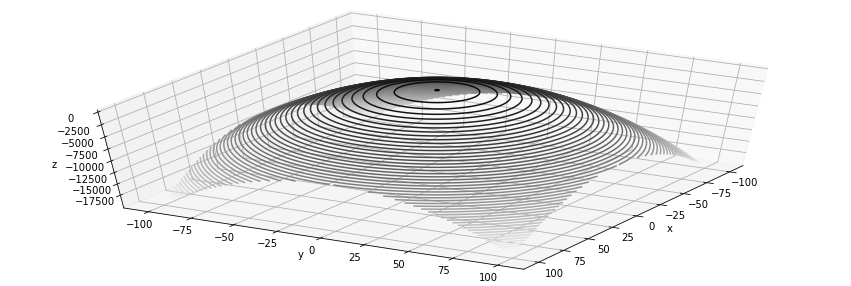

In [20]:
# 임의의 함수 최적화 하기

# Black Box Function은 임의의 어떤 Cost Function이라 가정
# X와 Y는 하이퍼 파라미터일 때, 어떤 최적의 값이 Black Box Function을 최대화할 수 있는지 확인
def black_box_function(x,y):
    return -x**2 - (y-0) **2 +1

x_range = np.linspace(-100, 100, num=1000) # -100 ~ 100 사이의 임의의 x를 만들어 냅니다.
y_range = np.linspace(-100, 100, num=1000) # -100 ~ 100 사이의 임의의 y를 만들어 냅니다.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x_range, y_range)
Z = black_box_function(X,Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 30)

- X = 0, Y = 0 에서 Blak Box Function이 최적화되는 모습을 확인
- 베이지안 옵티마이제이션에서도 같은 결과가 나오는가?

In [21]:
# 2. Getting Started
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (-10, 10), 'y': (-10, 10)}

# 세부 사항 설정
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1
)

# 최대화!!
optimizer.maximize(init_points=2, n_iter=30 )
    # n_iter: 반복 횟수 (많을 수록 정확한 값을 얻을 수 있다)
    # init_points: 초기 랜덤 포인트 갯수

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -21.17    | -1.66     | 4.406     |
| 2         | -114.6    | -9.998    | -3.953    |
| 3         | -22.34    | -1.565    | 4.571     |
| 4         | -11.46    | 3.441     | -0.7845   |
| 5         | -139.6    | 10.0      | -6.375    |
| 6         | -72.45    | 6.804     | 5.211     |
| 7         | -4.212    | -0.8927   | -2.101    |
| 8         | -199.0    | -10.0     | 10.0      |
| 9         | -100.2    | -1.084    | -10.0     |
| 10        | -2.05     | 0.8123    | 1.546     |
| 11        | -5.658    | -2.578    | 0.1145    |
| 12        | 0.5843    | 0.3728    | -0.526    |
| 13        | -0.3333   | -0.8388   | 0.7935    |
| 14        | -6.498    | 1.363     | -2.375    |
| 15        | 0.3306    | -0.6842   | -0.4487   |
| 16        | 0.8639    | 0.2248    | 0.2925    |
| 17        | -0.1243   | 1.059     | 0.06181   |
| 18        | 0.9912    | -0.09226  | -0.01794  |


In [22]:
# 최적의 (x, y) 값 결과 확인
print(optimizer.max)

# 초기 포인트 2개와 옵티마이제이션 30회 진행 결과 아래와 같은 최적 값 탐색
# 정확히 (0, 0)을 찾지 못했지만, 꽤 근접한 답을 찾음

{'target': 0.9988156640124644, 'params': {'x': -0.00889753408936384, 'y': -0.03324409533532695}}


In [23]:
 # 이전 history 를 확인
optimizer.res[-5:]

[{'target': 0.9868416376469109,
  'params': {'x': -0.046994819088606365, 'y': -0.10464152775986336}},
 {'target': 0.9893919795423832,
  'params': {'x': 0.10259825475173846, 'y': 0.009034300167372663}},
 {'target': 0.986810770984219,
  'params': {'x': -0.06203819244594198, 'y': 0.09664621924225122}},
 {'target': 0.988257848968717,
  'params': {'x': -0.044834360962243976, 'y': -0.09865105731004688}},
 {'target': 0.9904622777309624,
  'params': {'x': 0.09719316678058028, 'y': 0.00955042408481996}}]

In [24]:
# 진행 과정을 살펴본 결과, X, Y가 0 근처에서 높은 값을 갖는 것을 확인
# X의 범위를 -1~1 사이로 변경한 다음, 최적화 진행

# 2.1 Changing bounds
optimizer.set_bounds(new_bounds={"x": (-1, 1)})

# 이후 절차는 동일
optimizer.maximize( init_points=0, n_iter=5)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 33        | 0.9897    | -0.05373  | 0.08584   |
| 34        | 0.9923    | 0.08769   | 0.001783  |
| 35        | 0.988     | -0.05389  | -0.09551  |
| 36        | 0.9939    | 0.0769    | 0.01451   |
| 37        | 0.9911    | -0.05093  | 0.07922   |


In [25]:
# 최적의 파라미터 값 확인
print(optimizer.max)

{'target': 0.9988156640124644, 'params': {'x': -0.00889753408936384, 'y': -0.03324409533532695}}


#### 실제 모델을 이용
- CV를 최대한 이용하며, 최적의 Hyper Parameter 값 탐색

#### Ridge

In [26]:
# 모듈 불러오기
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# seed 고정!
np.random.seed(0)
n_samples, n_features = 100, 1 # 100개의 데이터와 1개의 변수 생성

X = np.random.randn(n_samples, n_features) # shape = (100 , 1)
y = np.random.randn(n_samples) # shape = (100 , )


# CV 를 이용한, Ridge 파라미터 찾기
def Ridge_cv(alpha):
    '''
    :param alpha: Ridge's 하이퍼 파라미터
    :return: -RMSE --> 최소화를 위해 음수 부호를 붙힘
    '''

    RMSE = cross_val_score(Ridge(alpha=alpha), X, y, scoring='neg_mean_squared_error', cv=5).mean()

    return -RMSE

In [27]:
# 파라미터를 탐색할 공간
# Ridge는 0 ~ 10 사이에서 적절한 값을 찾는다.
pbounds = {'alpha': ( 0, 10 )}

# 베이지안 옵티마이제이션 객체를 생성
Ridge_BO = BayesianOptimization( f = Ridge_cv, pbounds  = pbounds , verbose=2, random_state=1 )

# 최대화!!!
Ridge_BO.maximize(init_points=2, n_iter = 10)

Ridge_BO.max # 찾은 파라미터 값 확인

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 1.093     | 4.17      |
| 2         | 1.093     | 7.203     |
| 3         | 1.093     | 4.364     |
| 4         | 1.094     | 1.365     |
| 5         | 1.094     | 0.0       |
| 6         | 1.094     | 2.22e-16  |
| 7         | 1.094     | 2.22e-16  |
| 8         | 1.094     | 2.22e-16  |
| 9         | 1.094     | 2.22e-16  |
| 10        | 1.094     | 2.22e-16  |
| 11        | 1.094     | 2.22e-16  |
| 12        | 1.094     | 2.22e-16  |


{'target': 1.0941847591132594, 'params': {'alpha': 0.0}}

#### SVC

In [28]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

iris = datasets.load_iris()
X = iris.data
y = iris.target

def SVM_rbf_cv(gamma, C):
    model = svm.SVC(kernel = 'rbf', gamma=gamma, C = C)
    RMSE = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    return -RMSE

In [29]:
# 주어진 범위 사이에서 적절한 값을 찾는다.
pbounds = {'gamma': ( 0.001, 1000 ), "C": (0.001, 1000)}

# 베이지안 옵티마이제이션 객체를 생성
SVM_rbf_BO = BayesianOptimization( f = SVM_rbf_cv, pbounds = pbounds, verbose = 2, random_state = 1 )

# 메소드를 이용해 최대화!
SVM_rbf_BO.maximize(init_points=2, n_iter = 10)

SVM_rbf_BO.max # 찾은 파라미터 값 확인

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | -0.4      | 417.0     | 720.3     |
| 2         | -0.4      | 0.1154    | 302.3     |
| 3         | -0.92     | 989.1     | 13.53     |
| 4         | -0.4      | 0.001     | 864.6     |
| 5         | -0.4      | 417.6     | 715.9     |
| 6         | -0.4      | 1e+03     | 1e+03     |
| 7         | -0.9133   | 0.001     | 0.001     |
| 8         | -0.4      | 85.72     | 565.6     |
| 9         | -0.4      | 805.4     | 704.9     |
| 10        | -0.4      | 645.6     | 998.6     |
| 11        | -0.4      | 242.3     | 1e+03     |
| 12        | -0.4533   | 371.7     | 337.4     |


{'target': -0.4,
 'params': {'C': 417.0225876805693, 'gamma': 720.3247731176647}}

In [34]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb


iris = datasets.load_iris()
X = iris.data
y = iris.target


def XGB_cv(max_depth,learning_rate, n_estimators, gamma
           ,min_child_weight, max_delta_step, subsample
           ,colsample_bytree, silent=True, nthread=-1):
    model = xgb.XGBClassifier(max_depth=int(max_depth),
                              learning_rate=learning_rate,
                              n_estimators=int(n_estimators),
                              nthread=nthread,
                              gamma=gamma,
                              min_child_weight=min_child_weight,
                              max_delta_step=max_delta_step,
                              subsample=subsample,
                              colsample_bytree=colsample_bytree)
    RMSE = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    return -RMSE

# 주어진 범위 사이에서 적절한 값을 찾는다.
pbounds = {'max_depth': (5, 10),
          'learning_rate': (0.01, 0.3),
          'n_estimators': (50, 1000),
          'gamma': (0.01, 1.),
          'min_child_weight': (2, 10),
          'max_delta_step': (0, 0.1),
          'subsample': (0.7, 0.8),
          'colsample_bytree' :(0.5, 0.99)
          }

xgboostBO = BayesianOptimization(f = XGB_cv,pbounds = pbounds, verbose = 2, random_state = 1 )

# 메소드를 이용해 최대화!
xgboostBO.maximize(init_points=2, n_iter = 10)

xgboostBO.max # 찾은 파라미터 값 확인

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -0.9467   | 0.7043    | 0.7231    | 0.01003   | 0.03023   | 5.734     | 2.739     | 226.9     | 0.7346    |
| 2         | -0.9467   | 0.6944    | 0.5434    | 0.1316    | 0.06852   | 6.022     | 9.025     | 76.02     | 0.767     |
| 3         | -0.9467   | 0.8937    | 0.0132    | 0.2045    | 0.02019   | 7.309     | 6.618     | 999.7     | 0.7889    |
| 4         | -0.9467   | 0.8947    | 0.1603    | 0.1039    | 0.04322   | 9.796     | 7.179     | 566.8     | 0.7948    |
| 5         | -0.9467   | 0.7435    | 0.9008    | 0.238     | 0.06689   | 5.746     | 9.079     | 999.4     | 0.7911    |
| 6         | -0.9467   | 0.7138    | 0.2353    | 0.2049    | 0.08327   | 9.296     | 9.933     | 51.01     | 0.7233    |
| 7         | -0.9467   

{'target': -0.9466666666666665,
 'params': {'colsample_bytree': 0.7043407823042612,
  'gamma': 0.7231212485077365,
  'learning_rate': 0.010033168697030017,
  'max_delta_step': 0.030233257263183978,
  'max_depth': 5.733779454085565,
  'min_child_weight': 2.7387087581503824,
  'n_estimators': 226.94720080878736,
  'subsample': 0.7345560727043048}}

In [35]:
fit_xgb = xgb.XGBClassifier(max_depth= int( xgboostBO.max['params']['max_depth'] ),
                             learning_rate=xgboostBO.max['params']['learning_rate'],
                             n_estimators=int(xgboostBO.max['params']['n_estimators']),
                             gamma= xgboostBO.max['params']['gamma'],
                             min_child_weight=xgboostBO.max['params']['min_child_weight'],
                             max_delta_step=xgboostBO.max['params']['max_delta_step'],
                             subsample=xgboostBO.max['params']['subsample'],
                             colsample_bytree=xgboostBO.max['params']['colsample_bytree'])

In [36]:
model  = fit_xgb.fit(X,y)

#### Bayesian Optimization with optuna

In [12]:
#!pip install optuna

  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached Mako-1.2.3-py3-none-any.whl (78 kB)
  Using cached pyreadline3-3.4.1-py3-none-any.whl (95 kB)
  Using cached pyperclip-1.8.2.tar.gz (20 kB)
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ce22154c771743cdb344e01447a795807170bfb595a6232118725cb06ef52ffb
  Stored in directory: c:\users\lucky\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip


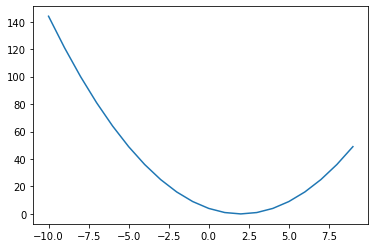

In [13]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10)
plt.plot(x, (x-2)**2)
plt.show()

In [14]:
"""
A simple optimization problem:

- Define objective function to be optimized. Let's minimize (x - 2)^2
- Suggest hyperparameter values using trial object. Here, a float value of x is suggested from -10 to 10
- Create a study object and invoke the optimize method over 100 trials
"""

import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

study.best_params

[I 2022-10-29 19:46:07,472] A new study created in memory with name: no-name-5a492835-094d-4538-8a83-06d59473513a
[I 2022-10-29 19:46:07,473] Trial 0 finished with value: 45.9031132074737 and parameters: {'x': -4.775183629059341}. Best is trial 0 with value: 45.9031132074737.
[I 2022-10-29 19:46:07,474] Trial 1 finished with value: 33.45553144198102 and parameters: {'x': 7.784075677407845}. Best is trial 1 with value: 33.45553144198102.
[I 2022-10-29 19:46:07,476] Trial 2 finished with value: 0.1701678223809284 and parameters: {'x': 2.412514026889909}. Best is trial 2 with value: 0.1701678223809284.
[I 2022-10-29 19:46:07,477] Trial 3 finished with value: 61.52289826201773 and parameters: {'x': -5.84365337467291}. Best is trial 2 with value: 0.1701678223809284.
[I 2022-10-29 19:46:07,478] Trial 4 finished with value: 38.53841935082321 and parameters: {'x': 8.20793197053763}. Best is trial 2 with value: 0.1701678223809284.
[I 2022-10-29 19:46:07,478] Trial 5 finished with value: 35.2819

{'x': 2.0273372866798183}

You can optimize Scikit-Learn hyperparameters in three steps:

1. Wrap model training with an objective function and return accuracy
2. Suggest hyperparameters using a trial object
3. Create a study object and execute the optimization

In [15]:
def objective(trial):
    
    # optuna.trial.Trial.suggest_categorical() for categorical parameters
    # optuna.trial.Trial.suggest_int() for integer parameters
    # optuna.trial.Trial.suggest_float() for floating point parameters    
    rf_n_estimators = trial.suggest_int("n_estimators", 100, 2000, step=100)
    rf_max_depth = trial.suggest_int("max_depth", 2, 64, log=True)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    classifier_obj = ensemble.RandomForestClassifier(
        n_estimators=rf_n_estimators, 
        max_depth=rf_max_depth,
        criterion=rf_criterion,
        n_jobs=-1, 
        random_state=0        
    )

    score = model_selection.cross_val_score(classifier_obj, X, y, cv=5, n_jobs=-1)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

[I 2022-10-29 19:46:07,858] A new study created in memory with name: no-name-eeebe968-e82a-4571-80d9-fefa0dd34910
[I 2022-10-29 19:46:09,205] Trial 0 finished with value: 0.8230000000000001 and parameters: {'n_estimators': 800, 'max_depth': 4, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8230000000000001.
[I 2022-10-29 19:46:10,660] Trial 1 finished with value: 0.8045 and parameters: {'n_estimators': 900, 'max_depth': 3, 'criterion': 'gini'}. Best is trial 0 with value: 0.8230000000000001.
[I 2022-10-29 19:46:13,402] Trial 2 finished with value: 0.8815 and parameters: {'n_estimators': 1500, 'max_depth': 30, 'criterion': 'gini'}. Best is trial 2 with value: 0.8815.
[I 2022-10-29 19:46:17,501] Trial 3 finished with value: 0.8845000000000001 and parameters: {'n_estimators': 2000, 'max_depth': 12, 'criterion': 'entropy'}. Best is trial 3 with value: 0.8845000000000001.
[I 2022-10-29 19:46:18,041] Trial 4 finished with value: 0.852 and parameters: {'n_estimators': 300, 'max_depth'

FrozenTrial(number=13, values=[0.8885000000000002], datetime_start=datetime.datetime(2022, 10, 29, 19, 46, 36, 80605), datetime_complete=datetime.datetime(2022, 10, 29, 19, 46, 39, 417082), params={'n_estimators': 1600, 'max_depth': 32, 'criterion': 'entropy'}, distributions={'n_estimators': IntDistribution(high=2000, log=False, low=100, step=100), 'max_depth': IntDistribution(high=64, log=True, low=2, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=13, state=TrialState.COMPLETE, value=None)


In [16]:
model = ensemble.RandomForestClassifier(**study.best_params, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=32, n_estimators=1600,
                       n_jobs=-1)

In [17]:
optuna.visualization.plot_optimization_history(study)

In [18]:
optuna.visualization.plot_parallel_coordinate(study)